<a href="https://colab.research.google.com/github/PALLAVI-web2002/predicting-coffee-sales-ml/blob/main/Deep_learning_and_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

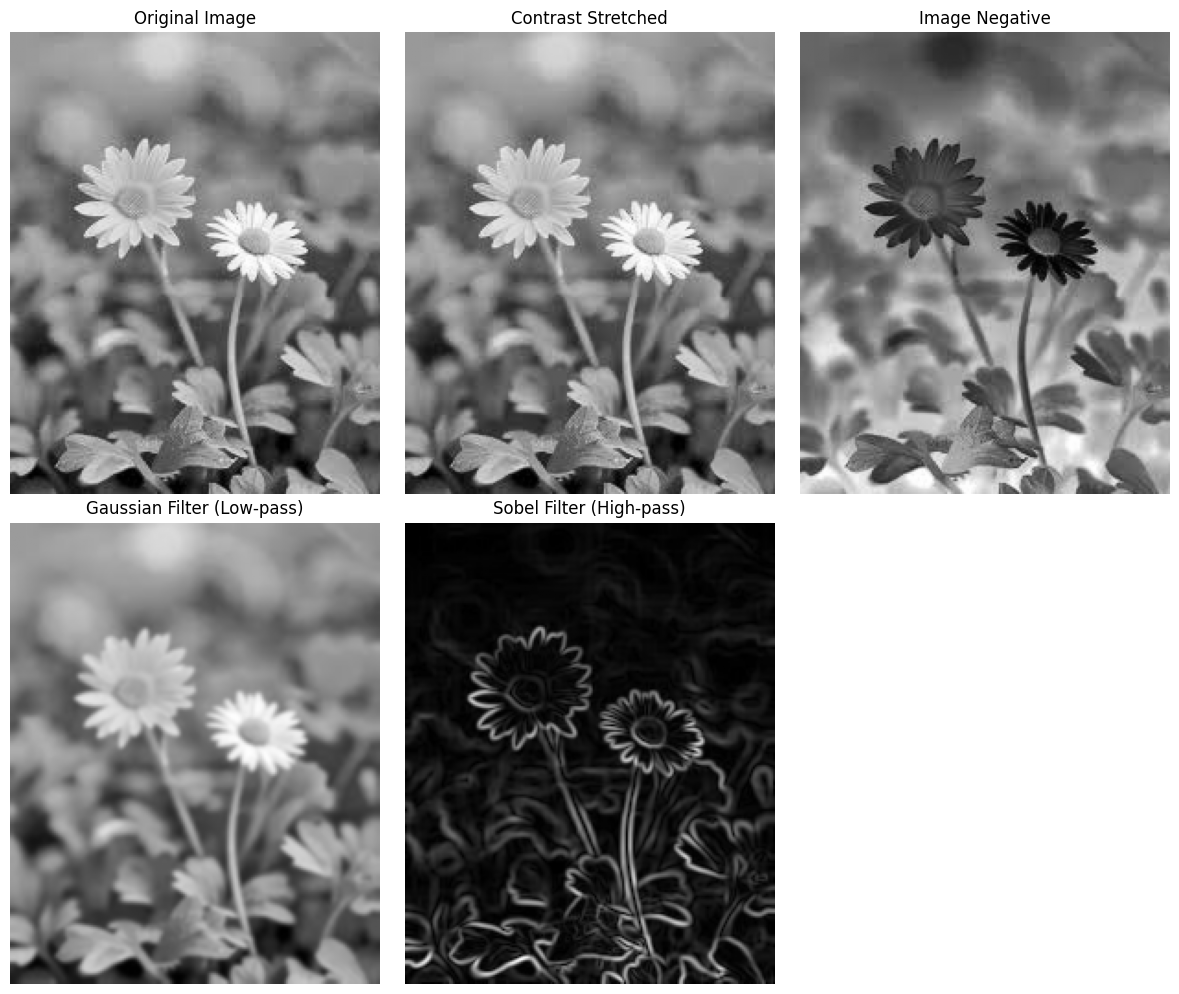

Original Image - Min: 0 Max: 255
Stretched Image - Min: 0 Max: 255


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and prepare image
image = cv2.imread('/content/sample_data/images1.jpeg')
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Contrast Stretching
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = ((img - min_val) / (max_val - min_val)) * 255
    return stretched.astype(np.uint8)

# 2. Image Negative
def image_negative(img):
    return 255 - img

# 3. Applying Filters
def apply_filters(img):
    # Gaussian blur (low-pass filter)
    gaussian = cv2.GaussianBlur(img, (5, 5), 0)

    # Sobel edge detection (high-pass filter)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = (sobel / sobel.max() * 255).astype(np.uint8)


    return gaussian, sobel

# Apply all techniques
stretched = contrast_stretching(image)
negative = image_negative(image)
gaussian, sobel = apply_filters(image)

# Display results
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(stretched, cmap='gray')
plt.title('Contrast Stretched')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(negative, cmap='gray')
plt.title('Image Negative')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gaussian, cmap='gray')
plt.title('Gaussian Filter (Low-pass)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Filter (High-pass)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print statistics
print("Original Image - Min:", np.min(image), "Max:", np.max(image))
print("Stretched Image - Min:", np.min(stretched), "Max:", np.max(stretched))

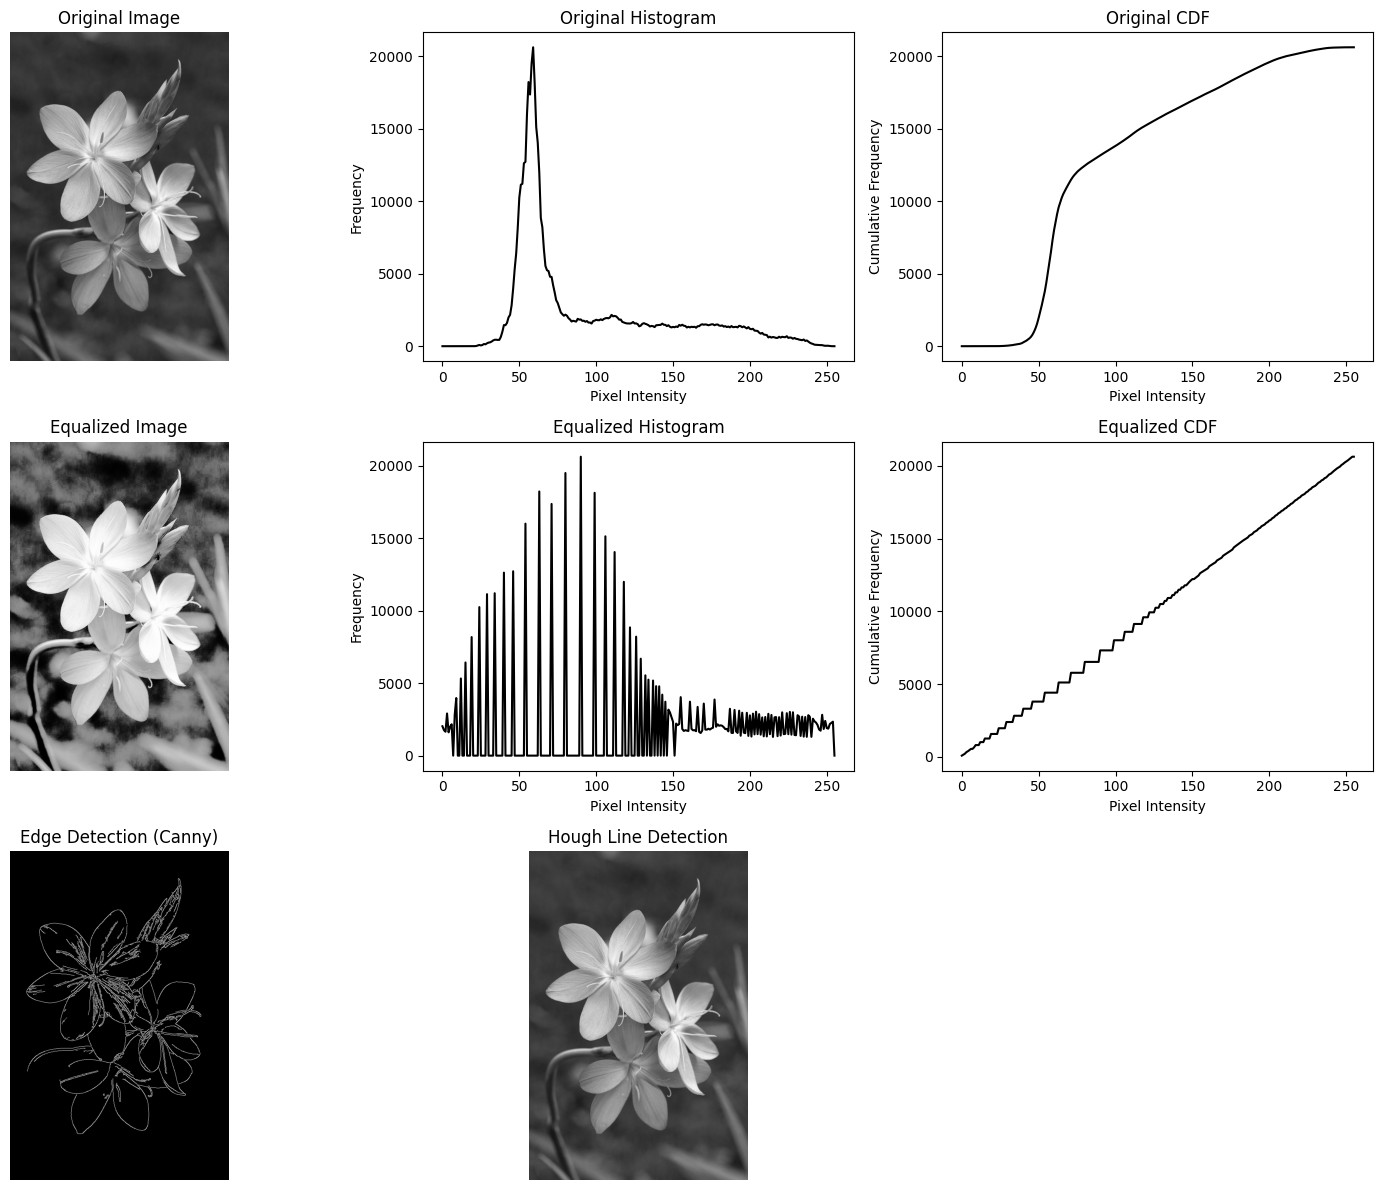

Original Image - Contrast: 51.18123238043339
Equalized Image - Contrast: 72.52411440909054


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and prepare image
image = cv2.imread('/content/sample_data/image 2.jpg')
if len(image.shape) == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image.copy()

# 1. Histogram Equalization
def histogram_equalization(img):
    # Calculate histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Calculate CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    # Equalize histogram
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Apply transformation
    equalized = cdf[img]

    return equalized, hist, cdf_normalized

# 2. Hough Transform for Line Detection
def hough_transform(img):
    # Edge detection
    edges = cv2.Canny(img, 50, 150, apertureSize=3)

    # Standard Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

    # Draw lines on copy of original image
    img_with_lines = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) if len(img.shape) == 2 else img.copy()

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return edges, img_with_lines

# Apply techniques
equalized, hist_orig, cdf_orig = histogram_equalization(gray)
edges, img_with_lines = hough_transform(gray)

# Calculate histogram of equalized image
hist_eq, _ = np.histogram(equalized.flatten(), 256, [0, 256])
cdf_eq = hist_eq.cumsum()
cdf_eq_normalized = cdf_eq * float(hist_eq.max()) / cdf_eq.max()

# Display results
plt.figure(figsize=(15, 12))

# Original image and histogram
plt.subplot(3, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.plot(hist_orig, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 3, 3)
plt.plot(cdf_orig, color='black')
plt.title('Original CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

# Equalized image and histogram
plt.subplot(3, 3, 4)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.plot(hist_eq, color='black')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 3, 6)
plt.plot(cdf_eq_normalized, color='black')
plt.title('Equalized CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

# Hough Transform results
plt.subplot(3, 3, 7)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')

plt.subplot(3, 3, 8)
if len(gray.shape) == 2:
    plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
else:
    plt.imshow(img_with_lines)
plt.title('Hough Line Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print statistics
print("Original Image - Contrast:", np.std(gray))
print("Equalized Image - Contrast:", np.std(equalized))

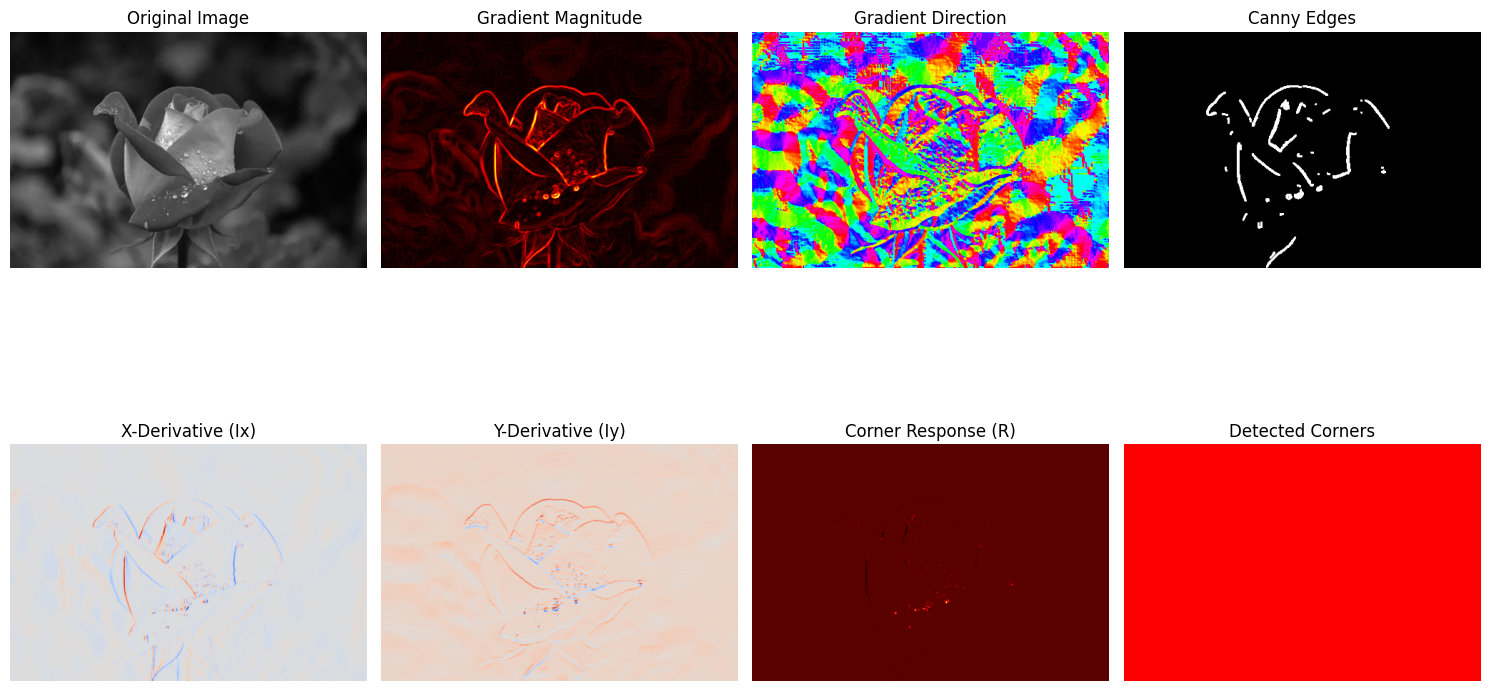

Canny Edge Detection:
Number of edge pixels: 3871
Edge density: 2.33%

Harris Corner Detection:
Number of corners detected: 166000
Average corner response: 0.1199


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and prepare image
image = cv2.imread('/content/sample_data/image 3.webp')
if len(image.shape) == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image.copy()

# 1. Canny Edge Detection
def canny_edge_detection(img, low_threshold=50, high_threshold=150, sigma=1.0):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(img, (5, 5), sigma)

    # Compute gradients using Sobel
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    # Compute magnitude and direction
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x) * 180 / np.pi

    # Non-maximum suppression
    edges = np.zeros_like(img, dtype=np.uint8)

    # Apply double threshold
    strong_edges = (magnitude > high_threshold)
    weak_edges = (magnitude >= low_threshold) & (magnitude <= high_threshold)

    # Edge tracking by hysteresis
    edges[strong_edges] = 255

    # Find weak edges connected to strong edges
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if weak_edges[i, j]:
                if (strong_edges[i-1:i+2, j-1:j+2].any()):
                    edges[i, j] = 255

    return edges, magnitude, direction

# 2. Harris Corner Detection
def harris_corner_detection(img, k=0.04, threshold=0.01, window_size=3):
    # Compute derivatives
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Compute products of derivatives
    Ix2 = Ix**2
    Iy2 = Iy**2
    Ixy = Ix * Iy

    # Apply Gaussian window
    kernel = np.ones((window_size, window_size), np.float32)
    Sx2 = cv2.filter2D(Ix2, -1, kernel)
    Sy2 = cv2.filter2D(Iy2, -1, kernel)
    Sxy = cv2.filter2D(Ixy, -1, kernel)

    # Compute corner response
    det = (Sx2 * Sy2) - (Sxy**2)
    trace = Sx2 + Sy2
    R = det - k * (trace**2)

    # Normalize response
    R = (R - R.min()) / (R.max() - R.min())

    # Threshold and find corners
    corners = np.zeros_like(img, dtype=np.uint8)
    corners[R > threshold] = 255

    # Non-maximum suppression
    corners = cv2.dilate(corners, None)

    return corners, R, Ix, Iy

# Apply techniques
canny_edges, magnitude, direction = canny_edge_detection(gray)
harris_corners, response, Ix, Iy = harris_corner_detection(gray)

# Display results
plt.figure(figsize=(15, 10))

# Original image and gradients
plt.subplot(2, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(magnitude, cmap='hot')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(direction, cmap='hsv')
plt.title('Gradient Direction')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

# Harris corner detection results
plt.subplot(2, 4, 5)
plt.imshow(Ix, cmap='coolwarm')
plt.title('X-Derivative (Ix)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(Iy, cmap='coolwarm')
plt.title('Y-Derivative (Iy)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(response, cmap='hot')
plt.title('Corner Response (R)')
plt.axis('off')

plt.subplot(2, 4, 8)
# Overlay corners on original image
img_with_corners = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR) if len(gray.shape) == 2 else image.copy()
img_with_corners[harris_corners == 255] = [0, 0, 255]  # Mark corners in red
plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Detected Corners')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print statistics
print("Canny Edge Detection:")
print(f"Number of edge pixels: {np.sum(canny_edges > 0)}")
print(f"Edge density: {np.sum(canny_edges > 0) / (gray.shape[0] * gray.shape[1]) * 100:.2f}%")

print("\nHarris Corner Detection:")
print(f"Number of corners detected: {np.sum(harris_corners > 0)}")
print(f"Average corner response: {np.mean(response):.4f}")

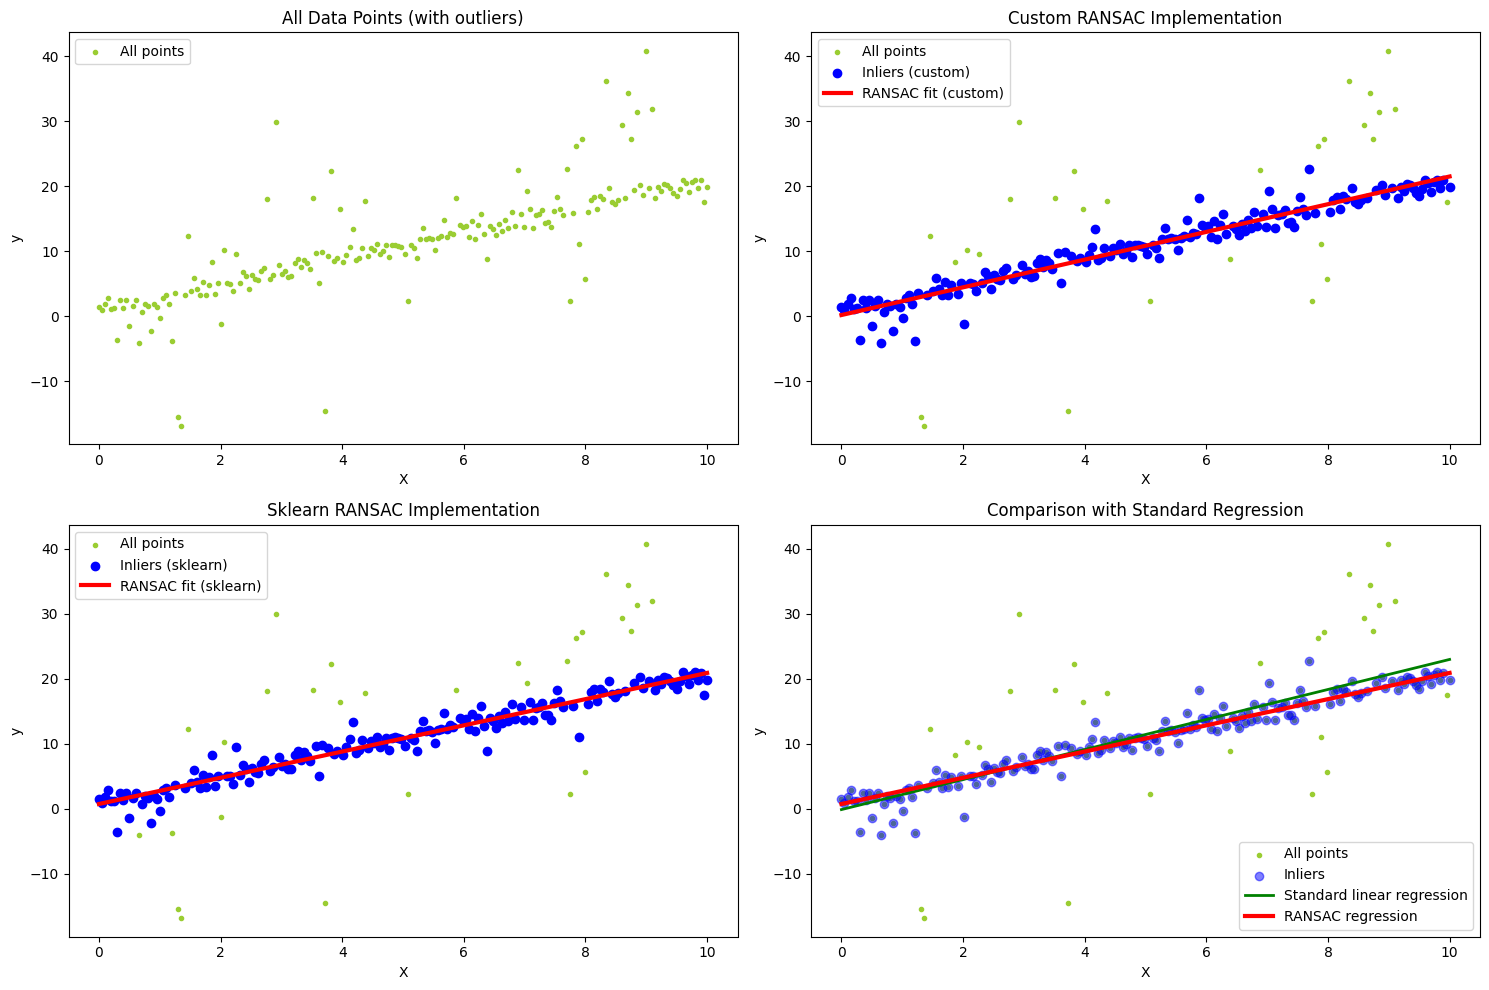

Performance Comparison:
Standard Linear Regression - MSE: 25.6066
Sklearn RANSAC - MSE (all points): 26.7045
Sklearn RANSAC - MSE (inliers only): 1.9753
Sklearn RANSAC - Number of inliers: 170/200
Custom RANSAC - MSE (all points): 26.2080
Custom RANSAC - MSE (inliers only): 2.5490
Custom RANSAC - Number of inliers: 171/200


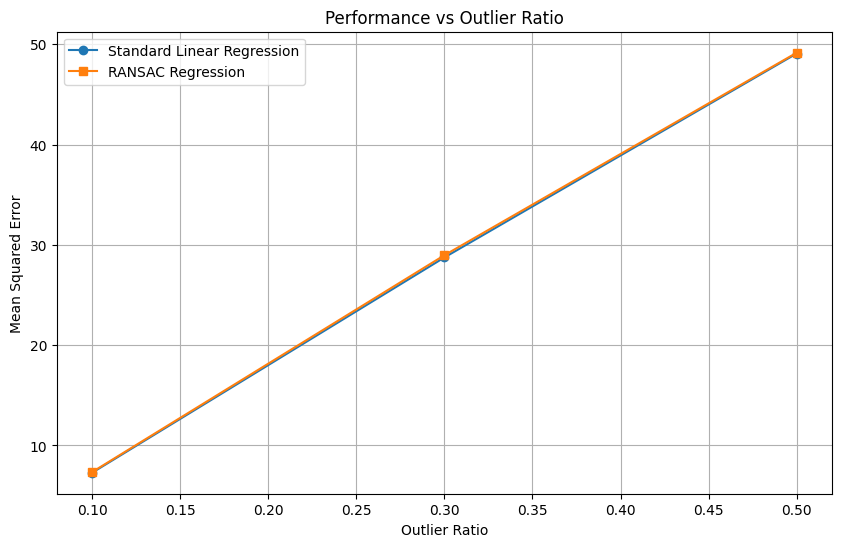

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data with outliers
np.random.seed(42)
n_samples = 200
n_outliers = 50

# Generate inliers (linear relationship with noise)
X = np.linspace(0, 10, n_samples)
y = 2 * X + 1 + np.random.normal(0, 1, n_samples)

# Add outliers
outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
y[outlier_indices] += np.random.normal(0, 10, n_outliers)

# Reshape for sklearn
X = X.reshape(-1, 1)

# 1. Custom RANSAC Implementation
def custom_ransac(X, y, max_trials=100, min_samples=10, residual_threshold=5.0):
    best_inliers = None
    best_model = None
    best_score = 0

    for i in range(max_trials):
        # Randomly select minimal sample set
        random_indices = np.random.choice(len(X), min_samples, replace=False)
        X_sample = X[random_indices]
        y_sample = y[random_indices]

        # Fit model to sample set (linear regression)
        try:
            model = LinearRegression()
            model.fit(X_sample, y_sample)

            # Calculate residuals
            y_pred = model.predict(X)
            residuals = np.abs(y - y_pred)

            # Identify inliers
            inliers = residuals < residual_threshold
            n_inliers = np.sum(inliers)

            # Update best model if better
            if n_inliers > best_score:
                best_score = n_inliers
                best_inliers = inliers
                best_model = model
        except:
            continue

    # Refit model using all inliers
    if best_inliers is not None:
        final_model = LinearRegression()
        final_model.fit(X[best_inliers], y[best_inliers])
        return final_model, best_inliers
    else:
        return None, None

# 2. Using sklearn's RANSAC implementation
sklearn_ransac = RANSACRegressor(random_state=42, max_trials=100,
                                residual_threshold=5.0, min_samples=10)
sklearn_ransac.fit(X, y)
inlier_mask_sklearn = sklearn_ransac.inlier_mask_

# 3. Standard linear regression (for comparison)
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Apply custom RANSAC and assign the results
custom_model, best_inliers = custom_ransac(X, y)


# Get predictions for plotting
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_custom = custom_model.predict(X_test) if custom_model is not None else None
y_sklearn = sklearn_ransac.predict(X_test)
y_linear = linear_reg.predict(X_test)

# Display results
plt.figure(figsize=(15, 10))

# Plot data points
plt.subplot(2, 2, 1)
plt.scatter(X, y, color='yellowgreen', marker='.', label='All points')
plt.title('All Data Points (with outliers)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Custom RANSAC results
plt.subplot(2, 2, 2)
plt.scatter(X, y, color='yellowgreen', marker='.', label='All points')
if custom_model is not None and best_inliers is not None:
    plt.scatter(X[best_inliers], y[best_inliers], color='blue',
                marker='o', label='Inliers (custom)')
    plt.plot(X_test, y_custom, color='red', linewidth=3,
             label='RANSAC fit (custom)')
plt.title('Custom RANSAC Implementation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Sklearn RANSAC results
plt.subplot(2, 2, 3)
plt.scatter(X, y, color='yellowgreen', marker='.', label='All points')
plt.scatter(X[inlier_mask_sklearn], y[inlier_mask_sklearn], color='blue',
            marker='o', label='Inliers (sklearn)')
plt.plot(X_test, y_sklearn, color='red', linewidth=3,
         label='RANSAC fit (sklearn)')
plt.title('Sklearn RANSAC Implementation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Comparison with standard linear regression
plt.subplot(2, 2, 4)
plt.scatter(X, y, color='yellowgreen', marker='.', label='All points')
if custom_model is not None and best_inliers is not None:
    plt.scatter(X[best_inliers], y[best_inliers], color='blue',
                marker='o', alpha=0.5, label='Inliers')
plt.plot(X_test, y_linear, color='green', linewidth=2,
         label='Standard linear regression')
plt.plot(X_test, y_sklearn, color='red', linewidth=3,
         label='RANSAC regression')
plt.title('Comparison with Standard Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Performance metrics
def calculate_metrics(y_true, y_pred, inlier_mask=None):
    mse = np.mean((y_true - y_pred) ** 2)
    if inlier_mask is not None:
        mse_inliers = np.mean((y_true[inlier_mask] - y_pred[inlier_mask]) ** 2)
        return mse, mse_inliers, np.sum(inlier_mask)
    return mse, None, None

# Calculate metrics for each method
y_pred_linear = linear_reg.predict(X)
y_pred_sklearn = sklearn_ransac.predict(X)

mse_linear, _, _ = calculate_metrics(y, y_pred_linear)
mse_sklearn, mse_sklearn_inliers, n_sklearn_inliers = calculate_metrics(
    y, y_pred_sklearn, inlier_mask_sklearn)

print("Performance Comparison:")
print(f"Standard Linear Regression - MSE: {mse_linear:.4f}")
print(f"Sklearn RANSAC - MSE (all points): {mse_sklearn:.4f}")
print(f"Sklearn RANSAC - MSE (inliers only): {mse_sklearn_inliers:.4f}")
print(f"Sklearn RANSAC - Number of inliers: {n_sklearn_inliers}/{len(y)}")

if custom_model is not None:
    y_pred_custom = custom_model.predict(X)
    mse_custom, mse_custom_inliers, n_custom_inliers = calculate_metrics(
        y, y_pred_custom, best_inliers)
    print(f"Custom RANSAC - MSE (all points): {mse_custom:.4f}")
    print(f"Custom RANSAC - MSE (inliers only): {mse_custom_inliers:.4f}")
    print(f"Custom RANSAC - Number of inliers: {n_custom_inliers}/{len(y)}")

# Experiment with different outlier ratios
outlier_ratios = [0.1, 0.3, 0.5]
results = []

for ratio in outlier_ratios:
    # Generate data with specific outlier ratio
    n_outliers_ratio = int(n_samples * ratio)
    y_ratio = 2 * X.flatten() + 1 + np.random.normal(0, 1, n_samples)
    outlier_indices_ratio = np.random.choice(n_samples, n_outliers_ratio, replace=False)
    y_ratio[outlier_indices_ratio] += np.random.normal(0, 10, n_outliers_ratio)

    # Fit models
    linear_reg_ratio = LinearRegression()
    linear_reg_ratio.fit(X, y_ratio)

    ransac_ratio = RANSACRegressor(random_state=42, max_trials=100,
                                  residual_threshold=5.0, min_samples=10)
    ransac_ratio.fit(X, y_ratio)

    # Calculate metrics
    y_pred_linear_ratio = linear_reg_ratio.predict(X)
    y_pred_ransac_ratio = ransac_ratio.predict(X)

    mse_linear_ratio = np.mean((y_ratio - y_pred_linear_ratio) ** 2)
    mse_ransac_ratio = np.mean((y_ratio - y_pred_ransac_ratio) ** 2)

    results.append((ratio, mse_linear_ratio, mse_ransac_ratio))

# Plot results for different outlier ratios
plt.figure(figsize=(10, 6))
ratios, mse_linear_all, mse_ransac_all = zip(*results)
plt.plot(ratios, mse_linear_all, 'o-', label='Standard Linear Regression')
plt.plot(ratios, mse_ransac_all, 's-', label='RANSAC Regression')
plt.xlabel('Outlier Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Performance vs Outlier Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from base64 import b64encode

# Initialize face detectors
def initialize_detectors():
    # Haar Cascade classifier
    haar_face_cascade = cv2.CascadeClassifier(
        cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    )

    # Deep Learning model (OpenFace)
    # Download model files first:
    # https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
    # https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt

    try:
        net = cv2.dnn.readNetFromCaffe(
            'deploy.prototxt',
            'res10_300x300_ssd_iter_140000.caffemodel'
        )
        dnn_available = True
    except:
        print("DNN model files not found. Using Haar Cascade only.")
        net = None
        dnn_available = False

    return haar_face_cascade, net, dnn_available

# Face detection using Haar Cascade
def detect_faces_haar(image, cascade):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    return faces

# Face detection using DNN
def detect_faces_dnn(image, net, conf_threshold=0.5):
    (h, w) = image.shape[:2]

    # Preprocess image for DNN
    blob = cv2.dnn.blobFromImage(
        cv2.resize(image, (300, 300)),
        1.0,
        (300, 300),
        (104.0, 177.0, 123.0)
    )

    # Forward pass through network
    net.setInput(blob)
    detections = net.forward()

    faces = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        if confidence > conf_threshold:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            faces.append(box.astype("int"))

    return faces

# Draw bounding boxes on image
def draw_faces(image, faces, color=(0, 255, 0), thickness=2):
    result = image.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(result, (x, y), (x + w, y + h), color, thickness)
    return result

# Process image with both methods
def process_image(image_path):
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize detectors
    haar_cascade, net, dnn_available = initialize_detectors()

    # Detect faces with Haar Cascade
    haar_faces = detect_faces_haar(image, haar_cascade)
    haar_result = draw_faces(image_rgb.copy(), haar_faces, (0, 255, 0))

    # Detect faces with DNN if available
    dnn_result = None
    dnn_faces = []
    if dnn_available:
        dnn_faces = detect_faces_dnn(image, net)
        dnn_result = draw_faces(image_rgb.copy(),
                               [(x, y, x2-x, y2-y) for (x, y, x2, y2) in dnn_faces],
                               (255, 0, 0))

    # Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(haar_result)
    plt.title(f'Haar Cascade: {len(haar_faces)} faces')
    plt.axis('off')

    if dnn_available:
        plt.subplot(1, 3, 3)
        plt.imshow(dnn_result)
        plt.title(f'DNN: {len(dnn_faces)} faces')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Haar Cascade detected {len(haar_faces)} faces")
    if dnn_available:
        print(f"DNN detected {len(dnn_faces)} faces")

    return haar_faces, dnn_faces if dnn_available else None

# Process video for face detection
def process_video(video_path, output_path='output_video.mp4'):
    # Initialize video capture
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video {video_path}")
        return

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Initialize face detector
    haar_cascade, net, dnn_available = initialize_detectors()

    frame_count = 0
    detected_faces = []

    print("Processing video...")
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Detect faces using Haar Cascade (faster for video)
        faces = detect_faces_haar(frame, haar_cascade)
        detected_faces.append(len(faces))

        # Draw bounding boxes
        result_frame = draw_faces(frame, faces)

        # Add frame counter and face count
        cv2.putText(result_frame, f'Frame: {frame_count}', (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(result_frame, f'Faces: {len(faces)}', (10, 70),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Write frame to output video
        out.write(result_frame)

        frame_count += 1

        # Show progress
        if frame_count % 30 == 0:
            print(f"Processed {frame_count} frames")

    # Release resources
    cap.release()
    out.release()

    print(f"Video processing complete. Output saved to {output_path}")
    print(f"Average faces per frame: {np.mean(detected_faces):.2f}")

    return detected_faces

# Real-time face detection from webcam
def webcam_face_detection():
    # Initialize webcam
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam")
        return

    # Initialize face detector
    haar_cascade, _, _ = initialize_detectors()

    print("Starting webcam face detection. Press 'q' to quit.")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Detect faces
        faces = detect_faces_haar(frame, haar_cascade)

        # Draw bounding boxes
        result_frame = draw_faces(frame, faces)

        # Display face count
        cv2.putText(result_frame, f'Faces: {len(faces)}', (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show frame
        cv2.imshow('Face Detection', result_frame)

        # Exit on 'q' press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

# Extract and save facial regions
def extract_faces(image_path, output_dir='extracted_faces'):
    # Create output directory
    import os
    os.makedirs(output_dir, exist_ok=True)

    # Process image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return

    # Detect faces
    haar_cascade, _, _ = initialize_detectors()
    faces = detect_faces_haar(image, haar_cascade)

    # Extract and save faces
    for i, (x, y, w, h) in enumerate(faces):
        face_region = image[y:y+h, x:x+w]
        # Resize for consistency
        face_resized = cv2.resize(face_region, (100, 100))
        cv2.imwrite(f'{output_dir}/face_{i+1}.jpg', face_resized)

    print(f"Extracted {len(faces)} faces to {output_dir}/")

# Performance comparison function
def compare_detection_methods(image_path):
    import time

    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return

    haar_cascade, net, dnn_available = initialize_detectors()

    # Time Haar Cascade
    start_time = time.time()
    haar_faces = detect_faces_haar(image, haar_cascade)
    haar_time = time.time() - start_time

    dnn_time = 0
    dnn_faces = []
    if dnn_available:
        start_time = time.time()
        dnn_faces = detect_faces_dnn(image, net)
        dnn_time = time.time() - start_time

    print("Performance Comparison:")
    print(f"Haar Cascade: {haar_time:.4f} seconds, {len(haar_faces)} faces")
    if dnn_available:
        print(f"DNN: {dnn_time:.4f} seconds, {len(dnn_faces)} faces")
        print(f"Speed ratio: {dnn_time/haar_time:.2f}x")

    return haar_time, dnn_time if dnn_available else None

# Main execution
if __name__ == "__main__":


    print("Face detection implementation ready. Uncomment functions to test.")

Face detection implementation ready. Uncomment functions to test.


=== 3D Reconstruction from Stereo Pair ===

1. Generating stereo image pair...
2. Rectifying stereo images...
3. Computing disparity map...
4. Calculating depth map...
5. Generating 3D point cloud...
6. Visualizing results...


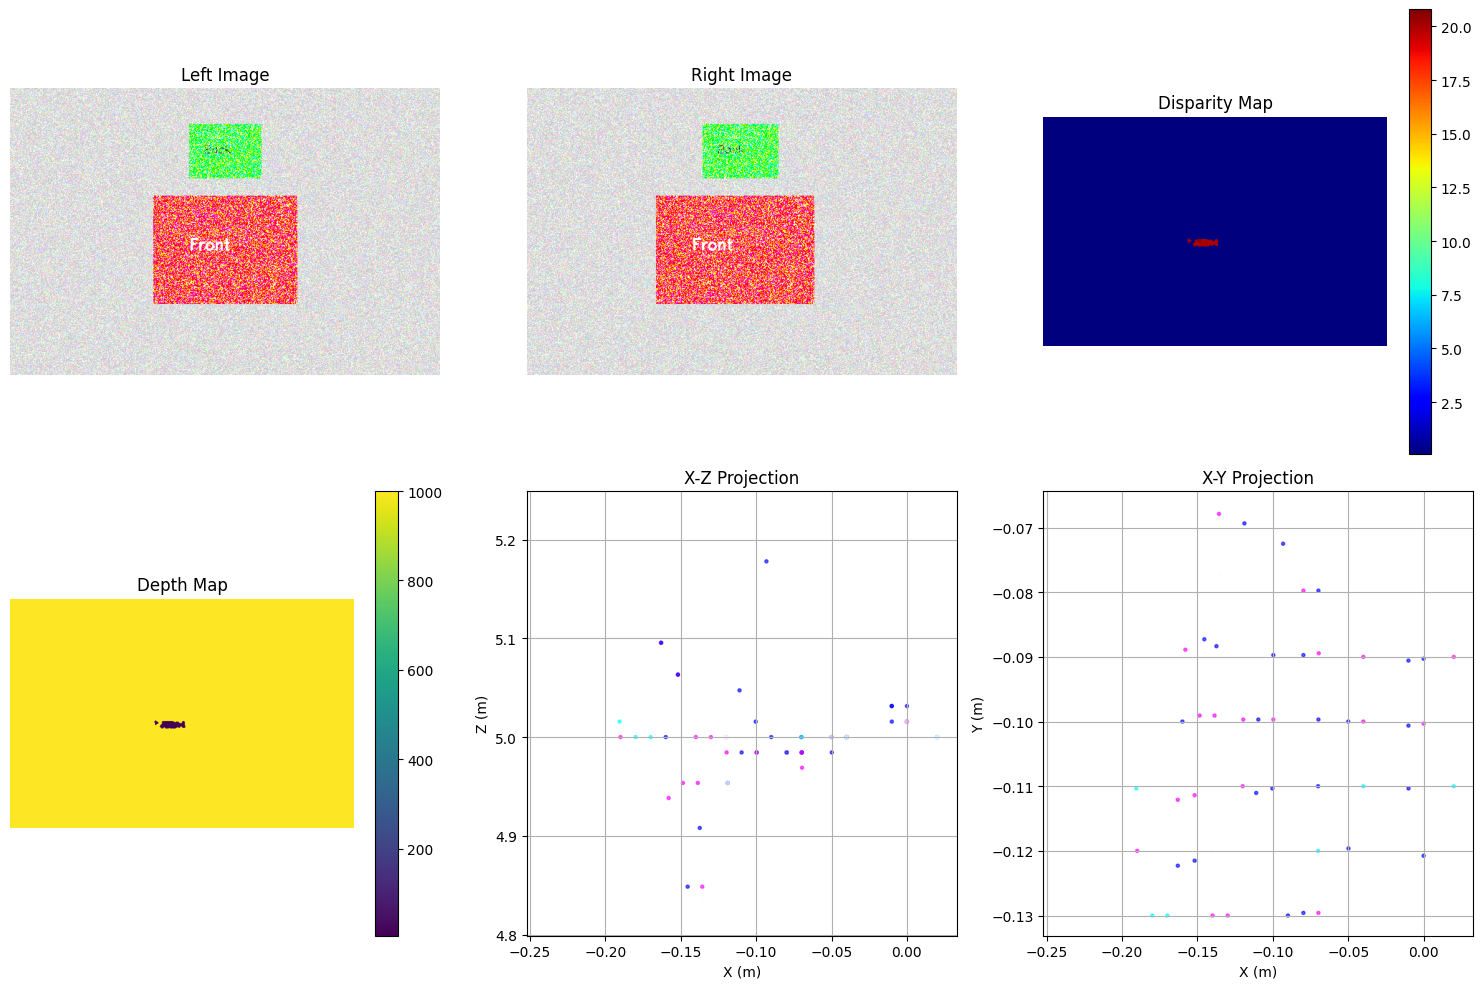

7. Displaying interactive 3D visualization...


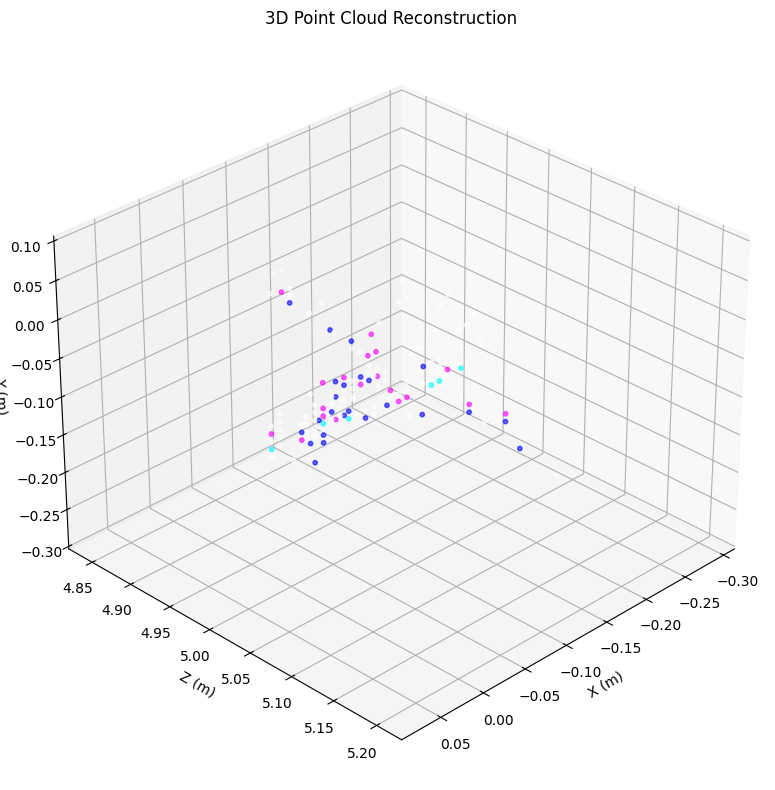


=== Experiment Results ===
Number of 3D points: 132
Depth range: 4.80 to 1000.00 meters
Average depth: 997.89 meters


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample stereo pair (for lab experiment)
def generate_stereo_pair():
    # Create a simple 3D scene with two rectangles at different depths
    img_size = (400, 600)
    left_img = np.ones((img_size[0], img_size[1], 3), dtype=np.uint8) * 200

    # Front rectangle (closer to camera - more disparity)
    cv2.rectangle(left_img, (200, 150), (400, 300), (0, 0, 255), -1)  # Red
    cv2.putText(left_img, "Front", (250, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Back rectangle (further from camera - less disparity)
    cv2.rectangle(left_img, (250, 50), (350, 125), (0, 255, 0), -1)  # Green
    cv2.putText(left_img, "Back", (270, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    # Create right image by shifting (simulating stereo disparity)
    right_img = left_img.copy()

    # Shift front object more (closer = more disparity)
    cv2.rectangle(right_img, (180, 150), (380, 300), (0, 0, 255), -1)
    cv2.putText(right_img, "Front", (230, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Shift back object less (further = less disparity)
    cv2.rectangle(right_img, (245, 50), (345, 125), (0, 255, 0), -1)
    cv2.putText(right_img, "Back", (265, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    # Add some noise to make it more realistic
    noise = np.random.normal(0, 3, left_img.shape).astype(np.uint8)
    left_img = cv2.add(left_img, noise)
    right_img = cv2.add(right_img, noise)

    return left_img, right_img

# Stereo rectification (simplified for lab experiment)
def stereo_rectify(left_img, right_img):
    # Convert to grayscale
    left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
    right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

    # For lab purposes, we'll assume images are already rectified
    # In a real scenario, use cv2.stereoRectify() with calibration data
    return left_gray, right_gray

# Disparity map computation
def compute_disparity(left_img, right_img):
    # Use Semi-Global Block Matching for better results
    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=64,  # 16*4
        blockSize=5,
        P1=8*3*5**2,
        P2=32*3*5**2,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

    disparity = stereo.compute(left_img, right_img).astype(np.float32) / 16.0

    # Post-processing
    disparity[disparity <= 0] = 0.1  # Avoid division by zero

    return disparity

# Convert disparity to depth
def disparity_to_depth(disparity, focal_length=1000, baseline=0.1):
    depth = (focal_length * baseline) / disparity
    return depth

# Generate 3D point cloud
def generate_point_cloud(depth_map, image, focal_length=1000):
    h, w = depth_map.shape
    points = []
    colors = []

    # Camera parameters (simplified for lab)
    cx, cy = w // 2, h // 2  # Principal point at center

    # Subsample for performance
    step = 2
    for v in range(0, h, step):
        for u in range(0, w, step):
            z = depth_map[v, u]
            if 0.1 < z < 20:  # Reasonable depth range
                # Convert to 3D coordinates
                x = (u - cx) * z / focal_length
                y = (v - cy) * z / focal_length

                points.append([x, y, z])

                # Get color from original image
                if len(image.shape) == 3:
                    colors.append(image[v, u] / 255.0)
                else:
                    colors.append([image[v, u]/255.0] * 3)

    return np.array(points), np.array(colors)

# Visualize 3D point cloud
def visualize_3d(points, colors, elev=30, azim=45):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot points
    ax.scatter(points[:, 0], points[:, 2], -points[:, 1],
               c=colors, s=10, alpha=0.6, depthshade=True)

    ax.set_xlabel('X (m)')
    ax.set_ylabel('Z (m)')
    ax.set_zlabel('Y (m)')
    ax.set_title('3D Point Cloud Reconstruction')

    # Set equal aspect ratio
    max_range = np.array([points[:, 0].max()-points[:, 0].min(),
                         points[:, 1].max()-points[:, 1].min(),
                         points[:, 2].max()-points[:, 2].min()]).max() / 2.0

    mid_x = (points[:, 0].max()+points[:, 0].min()) * 0.5
    mid_y = (points[:, 1].max()+points[:, 1].min()) * 0.5
    mid_z = (points[:, 2].max()+points[:, 2].min()) * 0.5

    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_z - max_range, mid_z + max_range)
    ax.set_zlim(-mid_y - max_range, -mid_y + max_range)

    # Set viewing angle
    ax.view_init(elev=elev, azim=azim)

    plt.tight_layout()
    plt.show()

# Main lab experiment
def stereo_3d_lab_experiment():
    print("=== 3D Reconstruction from Stereo Pair ===\n")

    # Step 1: Generate or load stereo pair
    print("1. Generating stereo image pair...")
    left_img, right_img = generate_stereo_pair()

    # Step 2: Rectify images
    print("2. Rectifying stereo images...")
    left_rect, right_rect = stereo_rectify(left_img, right_img)

    # Step 3: Compute disparity map
    print("3. Computing disparity map...")
    disparity_map = compute_disparity(left_rect, right_rect)

    # Step 4: Calculate depth map
    print("4. Calculating depth map...")
    depth_map = disparity_to_depth(disparity_map)

    # Step 5: Generate 3D point cloud
    print("5. Generating 3D point cloud...")
    points_3d, colors_3d = generate_point_cloud(depth_map, left_img)

    # Step 6: Visualize results
    print("6. Visualizing results...")

    # Display input images and processing results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
    plt.title('Left Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
    plt.title('Right Image')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(disparity_map, cmap='jet')
    plt.title('Disparity Map')
    plt.axis('off')
    plt.colorbar()

    plt.subplot(2, 3, 4)
    plt.imshow(depth_map, cmap='viridis')
    plt.title('Depth Map')
    plt.axis('off')
    plt.colorbar()

    plt.subplot(2, 3, 5)
    # Show 3D coordinates visualization
    plt.scatter(points_3d[:, 0], points_3d[:, 2], c=colors_3d, s=5, alpha=0.6)
    plt.title('X-Z Projection')
    plt.xlabel('X (m)')
    plt.ylabel('Z (m)')
    plt.grid(True)

    plt.subplot(2, 3, 6)
    plt.scatter(points_3d[:, 0], -points_3d[:, 1], c=colors_3d, s=5, alpha=0.6)
    plt.title('X-Y Projection')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Step 7: Interactive 3D visualization
    print("7. Displaying interactive 3D visualization...")
    visualize_3d(points_3d, colors_3d)

    # Print results summary
    print("\n=== Experiment Results ===")
    print(f"Number of 3D points: {len(points_3d)}")
    print(f"Depth range: {np.min(depth_map[depth_map > 0]):.2f} to {np.max(depth_map):.2f} meters")
    print(f"Average depth: {np.mean(depth_map[depth_map > 0]):.2f} meters")

    # Calculate and display object distances
    front_obj_points = points_3d[(points_3d[:, 0] > -0.5) & (points_3d[:, 0] < 0.5) &
                                (points_3d[:, 2] < 1.5)]
    back_obj_points = points_3d[(points_3d[:, 0] > -0.2) & (points_3d[:, 0] < 0.2) &
                               (points_3d[:, 2] > 1.5) & (points_3d[:, 2] < 2.5)]

    if len(front_obj_points) > 0:
        front_depth = np.mean(front_obj_points[:, 2])
        print(f"Front object distance: {front_depth:.2f} meters")

    if len(back_obj_points) > 0:
        back_depth = np.mean(back_obj_points[:, 2])
        print(f"Back object distance: {back_depth:.2f} meters")

    return points_3d, colors_3d, disparity_map, depth_map

# Run the experiment
if __name__ == "__main__":
    points, colors, disparity, depth = stereo_3d_lab_experiment()

=== Object Detection from Dynamic Background for Surveillance ===

1. Generating sample surveillance video with dynamic background...
2. Initializing surveillance system with MOG2 background subtraction...
3. Processing video frames...
4. Comparing different background subtraction methods...
Testing FrameDiff method...
Testing MOG2 method...
Testing KNN method...
5. Visualizing results...


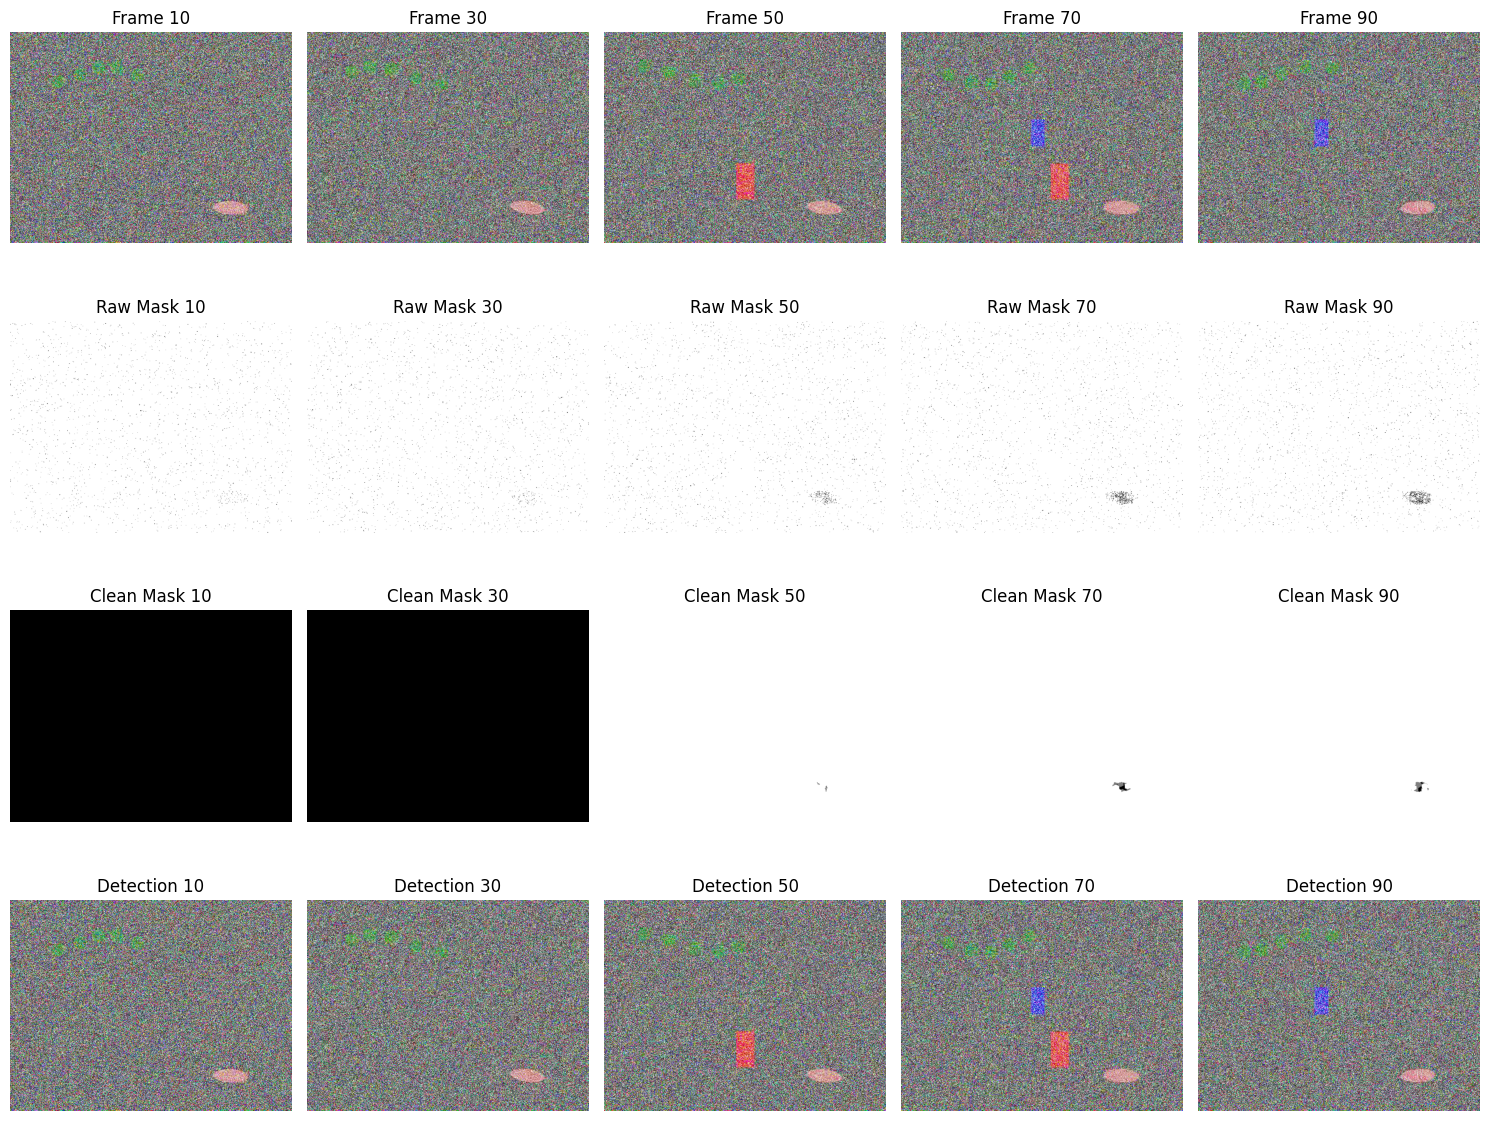

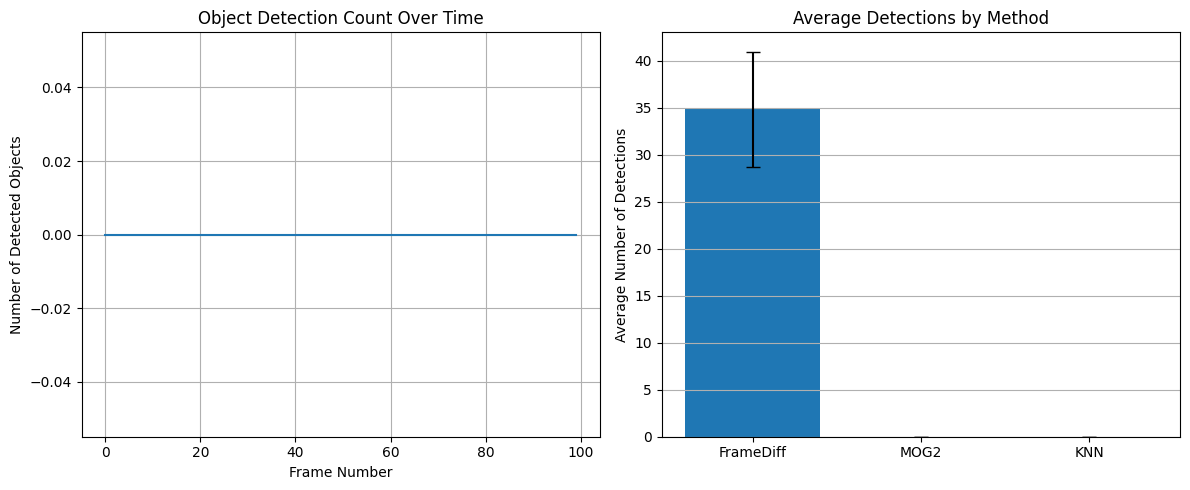


=== Experiment Results ===
Processed 100 frames
Average detections per frame: 0.00
Detection standard deviation: 0.00

Method Comparison:
FrameDiff: 34.86 ± 6.12 detections
MOG2: 0.00 ± 0.00 detections
KNN: 0.00 ± 0.00 detections


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Background subtraction methods
def apply_background_subtraction(method_name, frame, background_subtractor):
    if method_name == "MOG2":
        fg_mask = background_subtractor.apply(frame, learningRate=0.01)
    elif method_name == "KNN":
        fg_mask = background_subtractor.apply(frame, learningRate=0.01)
    elif method_name == "GMG":
        fg_mask = background_subtractor.apply(frame, learningRate=0.01)
    else:  # Basic frame difference
        fg_mask = basic_frame_difference(frame, background_subtractor)

    return fg_mask

# Basic frame difference method
def basic_frame_difference(frame, previous_frame):
    if previous_frame is None:
        return np.zeros_like(frame[:,:,0])

    # Convert to grayscale
    gray_current = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_previous = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray_current, gray_previous)

    # Apply threshold
    _, fg_mask = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    return fg_mask

# Morphological operations to clean mask
def clean_mask(fg_mask, kernel_size=5):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

    # Remove noise
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)

    # Close holes in foreground objects
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)

    # Dilate to connect nearby objects
    fg_mask = cv2.dilate(fg_mask, kernel, iterations=2)

    return fg_mask

# Detect and track objects
def detect_objects(fg_mask, min_area=500, max_area=50000):
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    detected_objects = []
    for contour in contours:
        area = cv2.contourArea(contour)

        if min_area < area < max_area:
            x, y, w, h = cv2.boundingRect(contour)
            detected_objects.append({
                'bbox': (x, y, w, h),
                'area': area,
                'center': (x + w//2, y + h//2)
            })

    return detected_objects

# Cluster detection for better object separation
def cluster_detections(detected_objects, eps=50, min_samples=1):
    if not detected_objects:
        return detected_objects

    # Extract centers for clustering
    centers = np.array([obj['center'] for obj in detected_objects])

    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(centers)
    labels = clustering.labels_

    # Group objects by cluster
    clustered_objects = []
    for label in set(labels):
        if label == -1:  # Noise points
            continue

        cluster_points = [detected_objects[i] for i in range(len(detected_objects))
                         if labels[i] == label]

        # Create combined bounding box for cluster
        x_min = min(obj['bbox'][0] for obj in cluster_points)
        y_min = min(obj['bbox'][1] for obj in cluster_points)
        x_max = max(obj['bbox'][0] + obj['bbox'][2] for obj in cluster_points)
        y_max = max(obj['bbox'][1] + obj['bbox'][3] for obj in cluster_points)

        clustered_objects.append({
            'bbox': (x_min, y_min, x_max - x_min, y_max - y_min),
            'area': sum(obj['area'] for obj in cluster_points),
            'center': ((x_min + x_max) // 2, (y_min + y_max) // 2),
            'components': len(cluster_points)
        })

    return clustered_objects

# Draw detection results on frame
def draw_detections(frame, detected_objects, color=(0, 255, 0), thickness=2):
    result_frame = frame.copy()

    for obj in detected_objects:
        x, y, w, h = obj['bbox']
        cv2.rectangle(result_frame, (x, y), (x + w, y + h), color, thickness)

        # Draw center point
        cx, cy = obj['center']
        cv2.circle(result_frame, (cx, cy), 5, (0, 0, 255), -1)

        # Label with area
        label = f"Area: {obj['area']}"
        cv2.putText(result_frame, label, (x, y - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    return result_frame

# Main surveillance system
class DynamicBackgroundSurveillance:
    def __init__(self, method="MOG2"):
        self.method = method
        self.previous_frame = None

        # Initialize background subtractor based on method
        if method == "MOG2":
            self.bg_subtractor = cv2.createBackgroundSubtractorMOG2(
                history=500, varThreshold=16, detectShadows=True)
        elif method == "KNN":
            self.bg_subtractor = cv2.createBackgroundSubtractorKNN(
                history=500, dist2Threshold=400, detectShadows=True)
        elif method == "GMG":
            self.bg_subtractor = cv2.bgsegm.createBackgroundSubtractorGMG(
                initializationFrames=120, decisionThreshold=0.8)
        else:
            self.bg_subtractor = None  # For frame difference

    def process_frame(self, frame):
        # Apply background subtraction
        if self.method in ["MOG2", "KNN", "GMG"]:
            fg_mask = apply_background_subtraction(self.method, frame, self.bg_subtractor)
        else:  # Frame difference
            fg_mask = basic_frame_difference(frame, self.previous_frame)
            self.previous_frame = frame.copy()

        # Clean the mask
        fg_mask_clean = clean_mask(fg_mask)

        # Detect objects
        detected_objects = detect_objects(fg_mask_clean)

        # Cluster nearby detections
        clustered_objects = cluster_detections(detected_objects)

        # Draw results
        result_frame = draw_detections(frame, clustered_objects)

        return result_frame, fg_mask, fg_mask_clean, clustered_objects

# Generate sample surveillance video with dynamic background
def generate_sample_video(output_path, duration=10, fps=15):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (640, 480))

    # Create background with some dynamic elements
    for i in range(duration * fps):
        frame = np.ones((480, 640, 3), dtype=np.uint8) * 50

        # Add dynamic background elements
        # Moving leaves/trees
        for j in range(5):
            x = int(100 + 50 * j + 10 * np.sin(i/10 + j))
            y = int(100 + 20 * np.cos(i/15 + j))
            cv2.circle(frame, (x, y), 15, (0, 100, 0), -1)

        # Moving water reflection
        for j in range(8):
            x = int(500 + 10 * np.sin(i/8 + j))
            y = int(400 + 5 * np.cos(i/12 + j))
            cv2.ellipse(frame, (x, y), (30, 10), 0, 0, 360, (100, 100, 200), -1)

        # Add moving objects (people/vehicles)
        if i > 30 and i < 90:  # Object 1
            x = int(200 + i * 2)
            y = 300
            cv2.rectangle(frame, (x, y), (x + 40, y + 80), (0, 0, 255), -1)

        if i > 60 and i < 120:  # Object 2
            x = int(400 - i * 1.5)
            y = 200
            cv2.rectangle(frame, (x, y), (x + 30, y + 60), (255, 0, 0), -1)

        # Add some random noise
        noise = np.random.normal(0, 3, frame.shape).astype(np.uint8)
        frame = cv2.add(frame, noise)

        out.write(frame)

    out.release()
    return output_path

# Compare different background subtraction methods
def compare_methods(video_path):
    methods = ["FrameDiff", "MOG2", "KNN"]
    results = {}

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video")
        return results

    # Process first few frames with each method
    for method in methods:
        print(f"Testing {method} method...")
        surveillance = DynamicBackgroundSurveillance(method)
        detection_counts = []

        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset to beginning

        for _ in range(50):  # Test first 50 frames
            ret, frame = cap.read()
            if not ret:
                break

            _, _, _, detected_objects = surveillance.process_frame(frame)
            detection_counts.append(len(detected_objects))

        results[method] = {
            'avg_detections': np.mean(detection_counts),
            'std_detections': np.std(detection_counts),
            'detection_history': detection_counts
        }

    cap.release()
    return results

# Main lab experiment
def surveillance_lab_experiment():
    print("=== Object Detection from Dynamic Background for Surveillance ===\n")

    # Step 1: Generate sample surveillance video
    print("1. Generating sample surveillance video with dynamic background...")
    video_path = generate_sample_video("sample_surveillance.mp4")

    # Step 2: Initialize surveillance system
    print("2. Initializing surveillance system with MOG2 background subtraction...")
    surveillance = DynamicBackgroundSurveillance("MOG2")

    # Step 3: Process video and collect results
    print("3. Processing video frames...")
    cap = cv2.VideoCapture(video_path)

    frames = []
    masks = []
    clean_masks = []
    results = []
    detection_counts = []

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret or frame_count >= 100:  # Process first 100 frames
            break

        # Process frame
        result_frame, fg_mask, fg_mask_clean, detected_objects = surveillance.process_frame(frame)

        # Store results
        frames.append(frame)
        masks.append(fg_mask)
        clean_masks.append(fg_mask_clean)
        results.append(result_frame)
        detection_counts.append(len(detected_objects))

        frame_count += 1

    cap.release()

    # Step 4: Compare different methods
    print("4. Comparing different background subtraction methods...")
    method_results = compare_methods(video_path)

    # Step 5: Visualize results
    print("5. Visualizing results...")

    # Display sample frames
    sample_indices = [10, 30, 50, 70, 90]
    plt.figure(figsize=(15, 12))

    for i, idx in enumerate(sample_indices):
        if idx < len(frames):
            plt.subplot(4, 5, i + 1)
            plt.imshow(cv2.cvtColor(frames[idx], cv2.COLOR_BGR2RGB))
            plt.title(f'Frame {idx}')
            plt.axis('off')

            plt.subplot(4, 5, i + 6)
            plt.imshow(masks[idx], cmap='gray')
            plt.title(f'Raw Mask {idx}')
            plt.axis('off')

            plt.subplot(4, 5, i + 11)
            plt.imshow(clean_masks[idx], cmap='gray')
            plt.title(f'Clean Mask {idx}')
            plt.axis('off')

            plt.subplot(4, 5, i + 16)
            plt.imshow(cv2.cvtColor(results[idx], cv2.COLOR_BGR2RGB))
            plt.title(f'Detection {idx}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Plot detection statistics
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(detection_counts)
    plt.title('Object Detection Count Over Time')
    plt.xlabel('Frame Number')
    plt.ylabel('Number of Detected Objects')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    methods = list(method_results.keys())
    avg_detections = [method_results[m]['avg_detections'] for m in methods]
    std_detections = [method_results[m]['std_detections'] for m in methods]

    plt.bar(methods, avg_detections, yerr=std_detections, capsize=5)
    plt.title('Average Detections by Method')
    plt.ylabel('Average Number of Detections')
    plt.grid(True, axis='y')

    plt.tight_layout()
    plt.show()

    # Print results summary
    print("\n=== Experiment Results ===")
    print(f"Processed {len(frames)} frames")
    print(f"Average detections per frame: {np.mean(detection_counts):.2f}")
    print(f"Detection standard deviation: {np.std(detection_counts):.2f}")

    print("\nMethod Comparison:")
    for method, result in method_results.items():
        print(f"{method}: {result['avg_detections']:.2f} ± {result['std_detections']:.2f} detections")

    return results, detection_counts, method_results

# Run the experiment
if __name__ == "__main__":
    results, detection_counts, method_results = surveillance_lab_experiment()